<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Walmart Data Analysis </title>
    <style>
        body {
            font-family: Arial, sans-serif;
            color: #444;
            background-color: #f7f7f7;
            padding: 20px;
        }
        h1, h2 {
            color: #cc6600;
        }
        h3 {
            color: #0066cc;
        }
        ul {
            list-style-type: none;
            padding: 0;
        }
        li {
            margin-bottom: 10px;
        }
        a {
            color: #009933;
            text-decoration: none;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>

<center><h1>Walmart Data Analysis</h1></center>

<h2>Project Overview:</h2>
<ul>
    <li>This project involves analyzing sales data from Walmart in order to gain insights into various aspects of their business operations, including product performance, customer trends, and market demand.</li>

</ul>

<h2>Dataset Details:</h2>
<ul>
    <li>Dataset Link: <a href="https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting" target="_blank">Walmart Recruiting - Store Sales Forecasting</a></li>
</ul>

<h2>Steps to Set Up and Run the Project:</h2>
<ol>
    <li><strong>Create a MySQL Database</strong>:
        <ul>
            <li>Open MySQL Workbench or any preferred MySQL client.</li>
            <li>Execute the SQL command: <code>CREATE DATABASE IF NOT EXISTS walmart;</code>.</li>
        </ul>
    </li>
    <li><strong>Update Connection Details</strong>:
        <ul>
            <li>Open <code>db_connection.py</code>.</li>
            <li>Modify connection parameters with your MySQL server details.</li>
        </ul>
    </li>
    <li><strong>Create Database Structure</strong>:
        <ul>
            <li>Run <code>send_data_to_mysql.py</code> to create the necessary table structure.</li>
        </ul>
    </li>
    <li><strong>Verify Database Connection</strong>:
        <ul>
            <li>Run <code>access_data_from_mysql.py</code> to ensure the connection and data access are successful.</li>
        </ul>
    </li>
    <li><strong>Ensure CSV File</strong>:
        <ul>
            <li>Make sure <code>WalmartSalesData.csv</code> is present in the specified location or update the file path accordingly.</li>
        </ul>
    </li>
</ol>

</body>
</html>


In [290]:
from db_connection import get_connection
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandasql import sqldf
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate


In [291]:
conn = get_connection()
cursor = conn.cursor()

 <center><h2>Generic</h2><centwe>

Number of Rows and Columns for future use

In [292]:
sql_row_count_query = "SELECT COUNT(*) FROM walmarttable"
cursor.execute(sql_row_count_query)
num_rows = cursor.fetchone()[0] 

sql_col_count_query = "SELECT COUNT(*) FROM information_schema.columns WHERE table_name = 'walmarttable'"
cursor.execute(sql_col_count_query)
num_cols = cursor.fetchone()[0] 

print("Number of rows in the table:", num_rows)
print("Number of columns in the table:", num_cols)

Number of rows in the table: 1000
Number of columns in the table: 17


### Basic

1. How many unique cities does the data have?

In [293]:
sql_query = "SELECT COUNT(DISTINCT City) FROM walmartTable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Number of unique cities:", result[0])

Number of unique cities: 3


2. What is the most common payment method?



Most common payment method:
Ewallet: 345 transactions


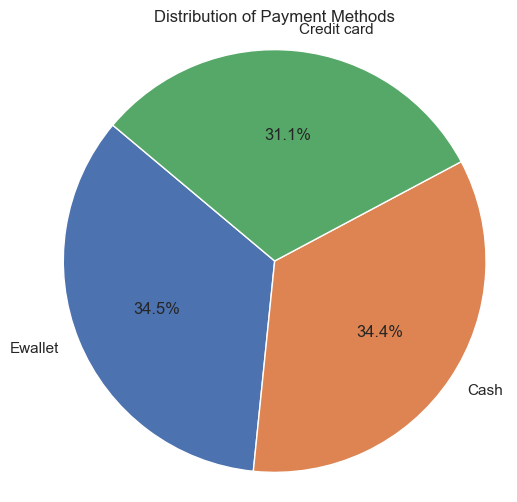

In [294]:
sql_query = "SELECT Payment, COUNT(*) AS Payment_Count FROM walmartTable GROUP BY Payment ORDER BY Payment_Count DESC LIMIT 1"

cursor.execute(sql_query)
result = cursor.fetchall()

print("Most common payment method:")
for row in result:
    print(f"{row[0]}: {row[1]} transactions")

cursor.execute("SELECT Payment, COUNT(*) AS Payment_Count FROM walmartTable GROUP BY Payment")
payments_data = cursor.fetchall()

labels = [row[0] for row in payments_data]
counts = [row[1] for row in payments_data]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.show()

3. How many unique product lines does the data have? and what are they?

In [295]:
sql_query = "SELECT COUNT(DISTINCT Product_line) FROM walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Number of unique product lines:", result[0])

sql_query = "SELECT DISTINCT Product_line FROM walmarttable"
cursor.execute(sql_query)
result1 = cursor.fetchall()  

print("They are: ")
for row in result1:
    print(row[0])  

Number of unique product lines: 6
They are: 
Health and beauty
Electronic accessories
Home and lifestyle
Sports and travel
Food and beverages
Fashion accessories


4. What is the average rating across all transactions?

In [296]:
sql_query = "SELECT SUM(rating) from walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Average rating across all transactions:", result[0]/num_rows)

Average rating across all transactions: 6.9727


5. What is the total revenue across all transactions?

In [297]:
sql_query = "SELECT SUM(Total) from walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Total revenue all transactions:", result[0])

Total revenue all transactions: 322966.7490


6. How many unique customer types does the data have?

In [298]:
sql_query = "SELECT COUNT(DISTINCT customer_type) from walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
print("Number of Unique customers:", result[0])

Number of Unique customers: 2


7. What is the most common customer type?

In [299]:
sql_query = "SELECT customer_type, COUNT(*) AS customer_type_count FROM walmartTable GROUP BY customer_type ORDER BY customer_type_count DESC LIMIT 1"
cursor.execute(sql_query)
result = cursor.fetchall()
print("Most common customer type:")
for row in result:
    print(f"{row[0]}: {row[1]} transactions")


Most common customer type:
Member: 501 transactions


8. What is the most common product line?



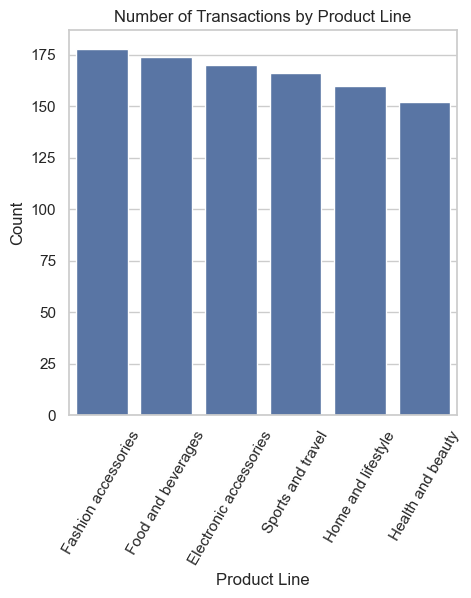

Most common product line:
Fashion accessories: 178 transactions


In [300]:
sql_query = "SELECT product_line, COUNT(*) AS product_line_count FROM walmarttable GROUP BY product_line ORDER BY product_line_count DESC LIMIT 1"
cursor.execute(sql_query)
result1 = cursor.fetchall()

sql_query = "SELECT product_line, COUNT(*) AS product_line_count FROM walmarttable GROUP BY product_line ORDER BY product_line_count DESC"
cursor.execute(sql_query)
result = cursor.fetchall()
df = pd.DataFrame(result, columns=['Product Line', 'Count'])
df = df.sort_values('Count', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Product Line', y='Count', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.title('Number of Transactions by Product Line')
plt.show()


print("Most common product line:")
for row in result1:
    print(f"{row[0]}: {row[1]} transactions")

9. What is the distribution of payment methods across different regions?



In [301]:
sql_query_citys = "SELECT DISTINCT city FROM walmarttable"
cursor.execute(sql_query_citys)
citys = cursor.fetchall()

for city in citys:
    city_name = city[0]
    print(f"city: {city_name}")
    
    sql_query_payment_count = f"""
        SELECT payment, COUNT(*) AS count
        FROM walmarttable
        WHERE city = '{city_name}'
        GROUP BY payment
    """
    cursor.execute(sql_query_payment_count)
    payment_counts = cursor.fetchall()
    
    total_transactions_query = f"""
        SELECT COUNT(*) AS total_transactions
        FROM walmarttable
        WHERE city = '{city_name}'
    """
    cursor.execute(total_transactions_query)
    total_transactions = cursor.fetchone()[0]

    dict = {}
    
    for payment_count in payment_counts:
        payment_method = payment_count[0]
        count = payment_count[1]
        percentage = (count / total_transactions) * 100
        dict[payment_method] = percentage

    print(dict)
   
    print()

city: Yangon
{'Ewallet': 37.05882352941177, 'Credit card': 30.58823529411765, 'Cash': 32.35294117647059}

city: Naypyitaw
{'Cash': 37.80487804878049, 'Ewallet': 32.31707317073171, 'Credit card': 29.878048780487802}

city: Mandalay
{'Credit card': 32.831325301204814, 'Ewallet': 34.036144578313255, 'Cash': 33.13253012048193}



10. What is the spatial distribution of ratings across different cities?

In [302]:
sql_query_cities = "SELECT DISTINCT city FROM walmarttable"
cursor.execute(sql_query_cities)
cities = cursor.fetchall()

for city in cities:
    city_name = city[0]
    print(f"City: {city_name}")
    
    avg_rating_query = f"""
        SELECT AVG(rating) AS avg_rating
        FROM walmarttable
        WHERE city = '{city_name}'
    """
    cursor.execute(avg_rating_query)
    avg_rating_result = cursor.fetchone()
    avg_rating = avg_rating_result[0] if avg_rating_result[0] is not None else "N/A"
    
    print(f"Average Rating: {avg_rating}\n")

City: Yangon
Average Rating: 7.02706

City: Naypyitaw
Average Rating: 7.07287

City: Mandalay
Average Rating: 6.81807



### Medium:



1. What month had the largest COGS?

In [303]:
sql_query = """
    SELECT EXTRACT(MONTH from date) as date,sum(cogs) as total_cogs 
    from walmarttable
    GROUP BY EXTRACT(MONTH from date)
    ORDER BY total_cogs DESC
    LIMIT 1
"""

cursor.execute(sql_query)

result = cursor.fetchone()

if result:
    month = result[0]
    total_cogs = result[1]
    print(f"The month with the largest COGS is {int(month)}, with a total COGS of {total_cogs}.")
else:
    print("No data found.")

The month with the largest COGS is 1, with a total COGS of 110754.16.


2. Which branch sold more products than the average product sold?



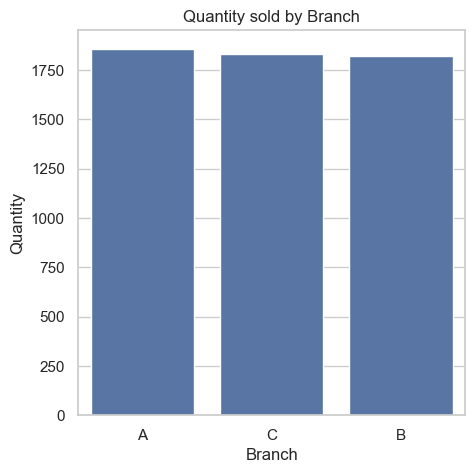

Branch A sold more than the average quantity of 1836.666666666666666666666667 with a total of 1859


In [304]:
sql_query = "SELECT COUNT(DISTINCT Branch) from walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
unique_branches = result[0]

sql_query = "SELECT SUM(Quantity) from walmarttable"
cursor.execute(sql_query)
result = cursor.fetchone()
total_quantity = result[0]

Average_quantity = total_quantity/unique_branches

sql_query = "SELECT DISTINCT BRANCH as branch, sum(quantity) as sum_quantity from walmarttable GROUP BY BRANCH ORDER BY sum_quantity"
cursor.execute(sql_query)
result = cursor.fetchall()
df = pd.DataFrame(result, columns=['Branch', 'Quantity'])
df = df.sort_values('Quantity', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='Branch', y='Quantity', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Quantity sold by Branch')
plt.show()

for row in result:
    if row[1] > Average_quantity:
        print(f"Branch {row[0]} sold more than the average quantity of {Average_quantity} with a total of {row[1]}")


3. What is the average total amount spent by each gender?

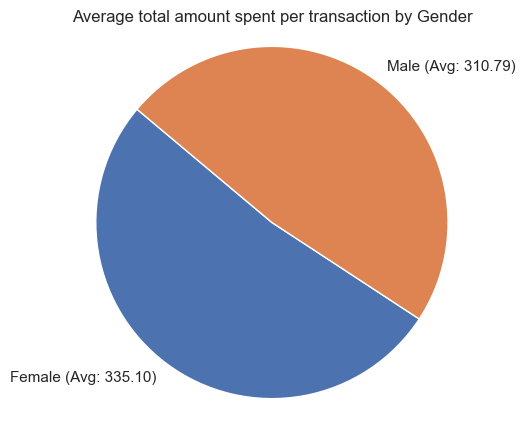

In [305]:
sql_query = "SELECT Gender, SUM(Total) AS total_spent, COUNT(*) AS num_transactions FROM walmarttable GROUP BY Gender"
cursor.execute(sql_query)
results = cursor.fetchall()

average_spent = [row[1] / row[2] for row in results]

labels = [f"{row[0]} (Avg: {avg:.2f})" for row, avg in zip(results, average_spent)]

plt.figure(figsize=(5,5))
plt.pie(average_spent, labels=labels, startangle=140)
plt.title('Average total amount spent per transaction by Gender')
plt.axis('equal')
plt.show()

Instead of Traversing or doing my queries on MySQL Database Everytime i want to create a DataFrame and use pandassql to do queries on the DataFrame - Type of SQL Literals


Creating DataFrame walmarttable

In [306]:
table_name = 'walmarttable'
query = f"SELECT * FROM {table_name}"
df = pd.read_sql(query, conn)
pysqldf = lambda q: sqldf(q, globals())

Adding sql query functionality to DataFrame

In [307]:
pysqldf = lambda q: sqldf(q, globals())

In [308]:
print(df)

      Invoice_ID Branch       City Customer_type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product_line  Unit_price  Quantity    Tax_5      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

4. What is the most common payment method by each product line?

In [309]:
result_df = pysqldf("""
                    SELECT product_line, MAX(payment) AS MostCommonpayment
                    FROM (
                        SELECT product_line, payment, COUNT(*) AS PaymentCount
                        FROM df
                        GROUP BY product_line, payment
                        )
                    GROUP BY product_line
                    """)

print(result_df)

             product_line MostCommonpayment
0  Electronic accessories           Ewallet
1     Fashion accessories           Ewallet
2      Food and beverages           Ewallet
3       Health and beauty           Ewallet
4      Home and lifestyle           Ewallet
5       Sports and travel           Ewallet


5. What is the distribution of customer types in each branch?

In [310]:
query = pysqldf(
    """
    SELECT BRANCH as branch, customer_type, COUNT(*) as count 
    FROM df 
    GROUP BY BRANCH, customer_type 
    ORDER BY branch, count
    """
)

print(query)


  branch Customer_type  count
0      A        Member    167
1      A        Normal    173
2      B        Member    165
3      B        Normal    167
4      C        Normal    159
5      C        Member    169


6. What is the average total amount spent by each time of the day?



In [311]:
query = pysqldf("""
SELECT DISTINCT Time, AVG(Total) as average_total_amount, COUNT(*) as number_of_transactions
FROM df
GROUP BY Time
ORDER BY average_total_amount DESC
""")

query['Time'] = pd.to_datetime(query['Time'], unit='ns').dt.time

print(tabulate(query, headers='keys', tablefmt='psql'))

+-----+----------+------------------------+--------------------------+
|     | Time     |   average_total_amount |   number_of_transactions |
|-----+----------+------------------------+--------------------------|
|   0 | 16:20:00 |              1039.29   |                        1 |
|   1 | 16:18:00 |              1023.75   |                        1 |
|   2 | 14:50:00 |               931.035  |                        1 |
|   3 | 19:41:00 |               926.951  |                        1 |
|   4 | 14:45:00 |               914.55   |                        1 |
|   5 | 19:12:00 |               864.57   |                        1 |
|   6 | 12:39:00 |               860.475  |                        1 |
|   7 | 20:32:00 |               830.371  |                        1 |
|   8 | 20:39:00 |               829.08   |                        1 |
|   9 | 20:51:00 |               827.164  |                        2 |
|  10 | 10:04:00 |               827.085  |                        1 |
|  11 

7. What is the distribution of payment methods across different branches?

In [312]:
query = pysqldf("""
    SELECT BRANCH as branch ,  payment as payment_method,count(payment) as count
    FROM df
    GROUP BY BRANCH,payment
""")

print(tabulate(query, headers='keys', tablefmt='psql'))



+----+----------+------------------+---------+
|    | branch   | payment_method   |   count |
|----+----------+------------------+---------|
|  0 | A        | Cash             |     110 |
|  1 | A        | Credit card      |     104 |
|  2 | A        | Ewallet          |     126 |
|  3 | B        | Cash             |     110 |
|  4 | B        | Credit card      |     109 |
|  5 | B        | Ewallet          |     113 |
|  6 | C        | Cash             |     124 |
|  7 | C        | Credit card      |      98 |
|  8 | C        | Ewallet          |     106 |
+----+----------+------------------+---------+


8. What is the average unit price by each customer type?



In [313]:
q = pysqldf(""" 
        SELECT customer_type,AVG(Unit_price) as Unit_price from df
        GROUP BY customer_type
 """)
print(q)

  Customer_type  Unit_price
0        Member   56.206986
1        Normal   55.135130


9. What is the distribution of product lines across different cities?



In [314]:
q = pysqldf(""" 
         SELECT product_line,city,COUNT(product_line) as count from df
            GROUP BY city,product_line     
""")
print(q)

              Product_line       City  count
0   Electronic accessories   Mandalay     55
1      Fashion accessories   Mandalay     62
2       Food and beverages   Mandalay     50
3        Health and beauty   Mandalay     53
4       Home and lifestyle   Mandalay     50
5        Sports and travel   Mandalay     62
6   Electronic accessories  Naypyitaw     55
7      Fashion accessories  Naypyitaw     65
8       Food and beverages  Naypyitaw     66
9        Health and beauty  Naypyitaw     52
10      Home and lifestyle  Naypyitaw     45
11       Sports and travel  Naypyitaw     45
12  Electronic accessories     Yangon     60
13     Fashion accessories     Yangon     51
14      Food and beverages     Yangon     58
15       Health and beauty     Yangon     47
16      Home and lifestyle     Yangon     65
17       Sports and travel     Yangon     59


10. What is the distribution of product lines across different branches?



In [315]:
q = pysqldf(""" 
            SELECT product_line,BRANCH,COUNT(product_line) as count from df 
            GROUP BY BRANCH,product_line
             """)
print(q)

              Product_line Branch  count
0   Electronic accessories      A     60
1      Fashion accessories      A     51
2       Food and beverages      A     58
3        Health and beauty      A     47
4       Home and lifestyle      A     65
5        Sports and travel      A     59
6   Electronic accessories      B     55
7      Fashion accessories      B     62
8       Food and beverages      B     50
9        Health and beauty      B     53
10      Home and lifestyle      B     50
11       Sports and travel      B     62
12  Electronic accessories      C     55
13     Fashion accessories      C     65
14      Food and beverages      C     66
15       Health and beauty      C     52
16      Home and lifestyle      C     45
17       Sports and travel      C     45
